# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Elom Gbogbo

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

# Imports

In [4]:
from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from textblob import TextBlob
import os
import pathlib

!pip list

print('All prereqs installed.')

Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.10.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.4
bleach                    6.2.0
blis                      1.3.0
catalogue                 2.0.10
certifi                   2025.8.3
cffi                      1.17.1
charset-normalizer        3.4.2
click                     8.2.1
cloudpathlib              0.21.1
colorama                  0.4.6
comm                      0.2.3
confection                0.1.5
contourpy                 1.3.3
cycler                    0.12.1
cymem                     2.0.11
debugpy                   1.8.15
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.0
fastjsonschema

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [5]:
import requests

url = "https://www.espn.com/nba/story/_/id/44422379/too-many-3-pointers-why-nba-think-issue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
                  "(KHTML, like Gecko) Chrome/122.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

with open("espn_three_pointers.html", "w", encoding="utf-8") as file:
    file.write(response.text)

print("HTML saved to espn_three_pointers.html")


HTML saved to espn_three_pointers.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [6]:

with open("espn_three_pointers.html", "r", encoding="utf-8") as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, "html.parser")
article_text = soup.get_text(separator=" ", strip=True)

blob = TextBlob(article_text)

polarity = blob.sentiment.polarity
num_sentences = len(blob.sentences)

print(f"Polarity Score: {polarity}")
print(f"Number of Sentences in Article: {num_sentences}")


Polarity Score: 0.10209772905590403
Number of Sentences in Article: 115


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [8]:
with open("espn_three_pointers.html", "r", encoding="utf-8") as f:
    html = f.read()

soup = BeautifulSoup(html, "html.parser")
text = soup.get_text(separator=" ", strip=True)

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

tokens = [t.text.lower() for t in doc if t.is_alpha and not t.is_stop]

freqs = Counter(tokens)
top5 = freqs.most_common(5)

print("Top 5 Tokens (lowercased, stopwords removed):")
for tok, cnt in top5:
    print(f"  {tok}")

print("\nToken Frequencies (token: count):")
for tok, cnt in top5:
    print(f"  {tok}: {cnt}")

Top 5 Tokens (lowercased, stopwords removed):
  nba
  point
  game
  season
  morey

Token Frequencies (token: count):
  nba: 48
  point: 31
  game: 23
  season: 15
  morey: 15


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [9]:
with open("espn_three_pointers.html", "r", encoding="utf-8") as f:
    html = f.read()

soup = BeautifulSoup(html, "html.parser")
text = soup.get_text(separator=" ", strip=True)


nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

lemma_freqs = Counter(lemmas)
top5_lemmas = lemma_freqs.most_common(5)

print("Top 5 Lemmas (lowercased, stopwords removed):")
for lemma, count in top5_lemmas:
    print(f"  {lemma}")

print("\nLemma Frequencies (lemma: count):")
for lemma, count in top5_lemmas:
    print(f"  {lemma}: {count}")

Top 5 Lemmas (lowercased, stopwords removed):
  nba
  game
  point
  team
  attempt

Lemma Frequencies (lemma: count):
  nba: 48
  game: 32
  point: 32
  team: 23
  attempt: 20


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

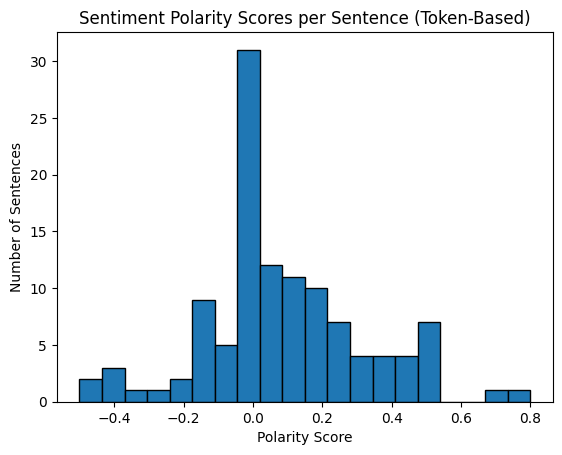

In [ ]:
with open("espn_three_pointers.html", "r", encoding="utf-8") as f:
    html = f.read()

soup = BeautifulSoup(html, "html.parser")
text = soup.get_text(separator=" ", strip=True)

blob = TextBlob(text)

sentence_scores = [sentence.sentiment.polarity for sentence in blob.sentences]

plt.hist(sentence_scores, bins=20, edgecolor="black")
plt.title("Sentiment Polarity Scores per Sentence (Token-Based)")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Sentences")
plt.show()

# Most common range of scores: around 0.0 to 0.1 (neutral to slightly positive)

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

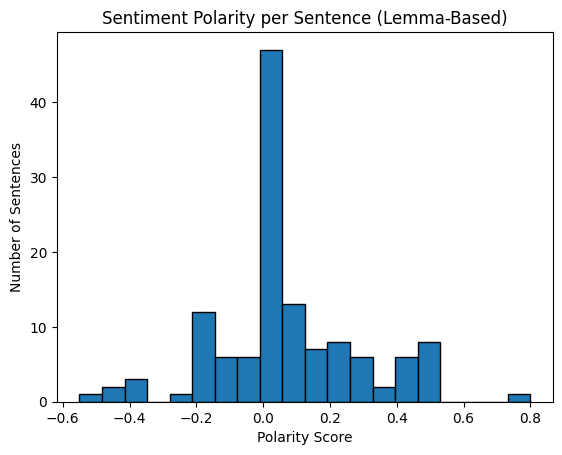

In [11]:
with open("espn_three_pointers.html", "r", encoding="utf-8") as f:
    html = f.read()

soup = BeautifulSoup(html, "html.parser")
text = soup.get_text(separator=" ", strip=True)


nlp = spacy.load("en_core_web_sm")
doc = nlp(text)


lemma_sentences = []
for sent in doc.sents:
    lemmas = [t.lemma_ for t in sent if t.is_alpha]
    lemma_sentences.append(" ".join(lemmas))

lemma_scores = [TextBlob(s).sentiment.polarity for s in lemma_sentences if s.strip()]

plt.hist(lemma_scores, bins=20, edgecolor="black")
plt.title("Sentiment Polarity per Sentence (Lemma-Based)")
plt.xlabel("Polarity Score")
plt.ylabel("Number of Sentences")
plt.show()

# Most common range of scores (update after viewing the plot):
# e.g., Most common range ≈ -0.1 to 0.1

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.20
* Cutoff Score (lemmas): 0.25

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [13]:

# Read HTML and extract text
with open("espn_three_pointers.html", "r", encoding="utf-8") as f:
    html = f.read()
text = BeautifulSoup(html, "html.parser").get_text(separator=" ", strip=True)

blob = TextBlob(text)
token_cutoff = 0.20

summary_sentences = []
for sent in blob.sentences:
    if sent.sentiment.polarity > token_cutoff:
        summary_sentences.append(str(sent).strip())   # <-- fix here

summary_text = " ".join(summary_sentences)
print("Token-Based Summary:\n")
print(summary_text)


Token-Based Summary:

Too many 3-pointers? Why the NBA doesn't think it's an issue - ESPN Skip to main content Skip to navigation < > Menu ESPN scores NFL NBA MLB NCAAF WNBA Soccer NHL More Sports Boxing NCAA Cricket F1 Gaming Golf Horse LLWS MMA NASCAR NLL NBA G League NBA Summer League NCAAM NCAAW NWSL Olympics PLL Professional Wrestling Racing RN BB RN FB Rugby Sports Betting Tennis TGL UFL X Games Editions Fantasy Watch ESPN BET ESPN+ NBA Home Offseason Moves Draft Scores Schedule Standings Stats Teams Transactions Players NBA Summer League Injuries Depth Charts Trade Machine Free Agency Fantasy NBA Power Rankings Odds Futures G League Awards NBA History Salaries NBA.COM tickets Tickets Three-pointer problem? It sparked a seasonlong conversation about how many 3-pointers are too many. For now, the league's analysis shows fans are generally positive about the NBA's style of play and the volume of 3s. Celtics pushing the envelope -- and narrative This time a year ago, it wasn't reall

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [14]:
# Create a TextBlob object from the summary text
summary_blob = TextBlob(summary_text)

# Get polarity and sentence count
summary_polarity = summary_blob.sentiment.polarity
summary_sentence_count = len(summary_blob.sentences)

# Print results with labels
print(f"Summary Polarity Score (Token-Based): {summary_polarity}")
print(f"Number of Sentences in Summary (Token-Based): {summary_sentence_count}")


Summary Polarity Score (Token-Based): 0.3654432156385281
Number of Sentences in Summary (Token-Based): 30


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [15]:
with open("espn_three_pointers.html", "r", encoding="utf-8") as f:
    html = f.read()
text = BeautifulSoup(html, "html.parser").get_text(separator=" ", strip=True)

nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

lemma_cutoff = 0.25

lemma_summary_sentences = []
for sent in doc.sents:
    lemmas = [token.lemma_ for token in sent if token.is_alpha]
    lemmatized_sentence = " ".join(lemmas)
    if lemmatized_sentence.strip():
        score = TextBlob(lemmatized_sentence).sentiment.polarity
        if score > lemma_cutoff:
            lemma_summary_sentences.append(sent.text.strip())

lemma_summary_text = " ".join(lemma_summary_sentences)

print("Lemma-Based Summary:\n")
print(lemma_summary_text)

Lemma-Based Summary:

Too many 3-pointers? Menu ESPN scores NFL NBA MLB NCAAF WNBA Soccer NHL More Sports Boxing NCAA Cricket F1 Gaming Golf Horse LLWS MMA NASCAR NLL NBA G League NBA Summer League NCAAM NCAAW NWSL Olympics PLL Professional Wrestling Racing RN BB RN FB Rugby Sports Betting Tennis TGL UFL X Games Editions Fantasy Watch ESPN BET ESPN+ Offseason Moves Draft Scores Schedule Standings Stats Teams Transactions Players NBA Summer League Injuries Depth Charts Trade Machine Free Agency Fantasy NBA Power Rankings It sparked a seasonlong conversation about how many 3-pointers are too many. Celtics pushing the envelope -- and narrative This time a year ago, it wasn't really clear that shooting more 3s was in fact the right approach for NBA teams. In part because of the success the Rockets enjoyed, that trend reversed. During the 2023-24 regular season, teams that shot more 3s won just 48% of the time, the fourth time in a five-year span they had been below .500. The team that took

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [16]:
# Create a TextBlob from the lemma-based summary text
lemma_summary_blob = TextBlob(lemma_summary_text)

# Calculate polarity and sentence count
lemma_summary_polarity = lemma_summary_blob.sentiment.polarity
lemma_summary_sentence_count = len(lemma_summary_blob.sentences)

# Print results with labels
print(f"Summary Polarity Score (Lemma-Based): {lemma_summary_polarity}")
print(f"Number of Sentences in Summary (Lemma-Based): {lemma_summary_sentence_count}")


Summary Polarity Score (Lemma-Based): 0.3902585889288017
Number of Sentences in Summary (Lemma-Based): 20


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity score of the original article was 0.10, while the token-based summary had a polarity score of 0.37 and the lemma-based summary had a polarity score of 0.39. Both summaries showed a higher polarity score than the original article. This is likely because the summarization process selected only sentences with higher sentiment scores, removing many of the neutral or less emotionally charged sentences present in the full article. As a result, the summaries emphasize more opinionated or positive statements, which raises the overall polarity.


13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Based on my reading of the original article, the lemma-based summary is slightly better. While both summaries captured the main points, the lemma-based approach seemed to include a more balanced selection of sentences that maintained the original flow and context. This may be because lemmatization groups related word forms together, leading to more consistent sentiment scoring and better sentence selection. As a result, the lemma-based summary felt more coherent and representative of the article’s key ideas.
